# Régression Linéaire

Le modèle le plus simple parmis les modèles de Machine Learning.

Etant données deux variables X et Y, dites respectivement variable explicative et variable cible, la régression linéaire simple consiste en la modélisation d'un lien linéaire entre X et Y, puis en la prédiction de la valeur de Y à partir des valeurs de X.

Le modèle usuel de régression linéaire simple est le suivant :  $ 𝑦=β_{0}+β_{1}𝑥+ε $ cas simple, où :

- 𝑦 est une variable quantitative continue à prédire (variable cible).
- 𝑥 est une variable quantitative continue (variable explicative).
- ε est un terme d’erreur aléatoire de loi normale d’espérance nulle et d’écart-type σ.

Le modèle de régression estime les coefficients  $β_{0}$ et  $β_{1}$ par  $β̃^{}_{0}$
  et $β̃^{}_{1}$
 , nous permettant de calculer les valeurs ajustées  $ 𝑦̃ =β̃^{}_{0}+β̃^{}_{1}𝑥 $
 . Les résidus sont définis par  $ε=𝑦−𝑦̃$.

l'idée reste pareil pour le cas de variable mutible.

Le modèle usuel de régression linéaire multiple est le suivant :
$$
𝑦𝑖=β_{0}+β_{1}𝑥_{𝑖,1}+β_{2}𝑥_{𝑖,2}+⋯+β_{𝑝}𝑥_{𝑖,𝑝}+ε_{𝑖}=β_{0}+\sum_{j=1}^{p} \beta_j x_{i,j} + \varepsilon_i ,
$$
où :
- $𝑦_{𝑖}$ est une variable quantitative continue dont on veut prédire la valeur pour une observation  𝑖 (variable cible).
- $𝑥_{1},…,𝑥_{𝑝}$ sont des variables quantitatives continues explicatives.
- ε_{𝑖} est un terme d'erreur aléatoire de loi normale  $\mathcal{N}(0, \sigma^2)$
.

pour résoudre ce problèm on utilise la méthode de moindre carré ordinaire. on peut écrire l'équation sous forme de matrice:
$$
\mathbf{y} = \mathbf{X}\boldsymbol{\theta} + \boldsymbol{\varepsilon},
\quad
\varepsilon \sim \mathcal{N}(0, \sigma^2 \mathbf{I})
$$

on minimise l"erreur et après résoudre l'équation on a:

$$
\hat{\boldsymbol{\theta}}
= (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}
$$



# Cas pratique sur Régression Linéaire

In [60]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('data/Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [32]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   str    
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   str    
 6   Alley            198 non-null    str    
 7   Lot Shape        2930 non-null   str    
 8   Land Contour     2930 non-null   str    
 9   Utilities        2930 non-null   str    
 10  Lot Config       2930 non-null   str    
 11  Land Slope       2930 non-null   str    
 12  Neighborhood     2930 non-null   str    
 13  Condition 1      2930 non-null   str    
 14  Condition 2      2930 non-null   str    
 15  Bldg Type        2930 non-null   str    
 16  House Style      2930 non-null   str    
 17  Overall Qual     2930 non

## traintement des données

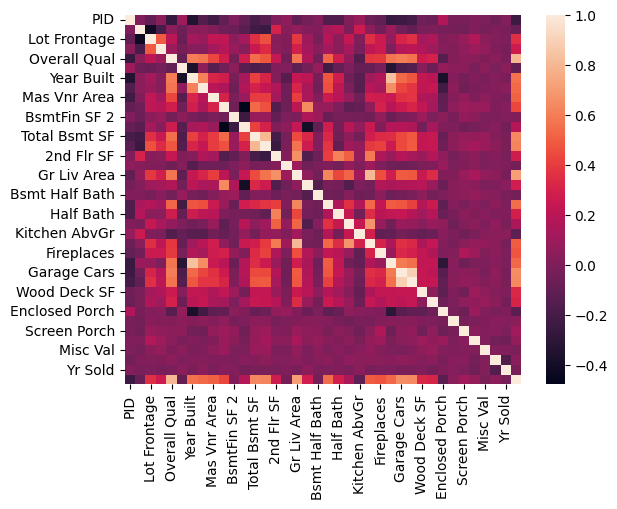

In [33]:
sns.heatmap(df.corr(numeric_only=True));

In [34]:
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).head(5)

SalePrice       1.000000
Overall Qual    0.799262
Gr Liv Area     0.706780
Garage Cars     0.647877
Garage Area     0.640401
Name: SalePrice, dtype: float64

On observe une fort corrélation avec Overall Quall avec la variable cible.

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

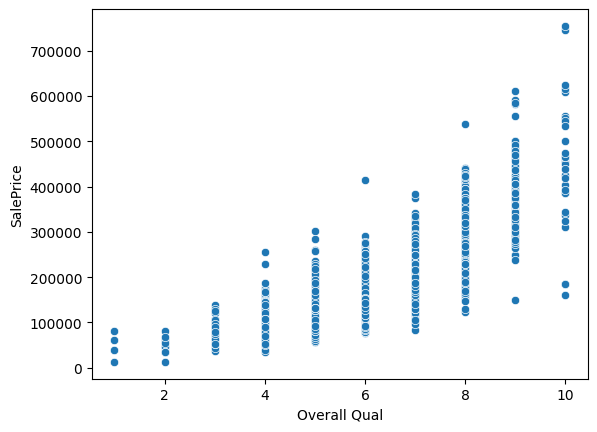

In [35]:
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')

On peut observer quelque point semblé faussé, normalement plus le qualité augmente le price l'est aussi. mais certain semble mal positionné mais la c'est pas facile de le dire tout suit si c'est outlier, on doit donc procéder à une analyse plus profondre pour en déduire.

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

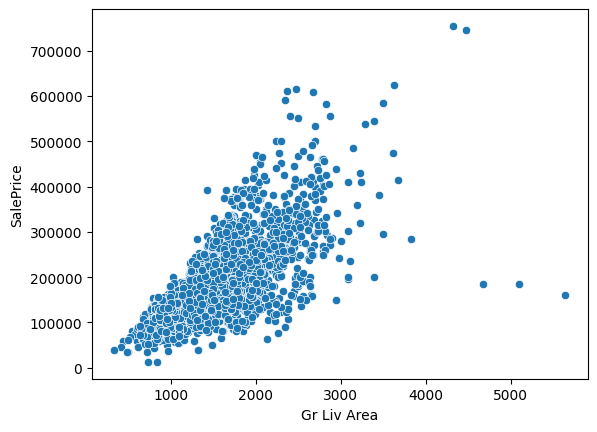

In [36]:
sns.scatterplot(x=df["Gr Liv Area"], y=df["SalePrice"])

In [37]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [38]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


donc ces point avec raison inconnu, est des outliers pour notre modèle

In [39]:
drop_index = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)].index
df = df.drop(drop_index, axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

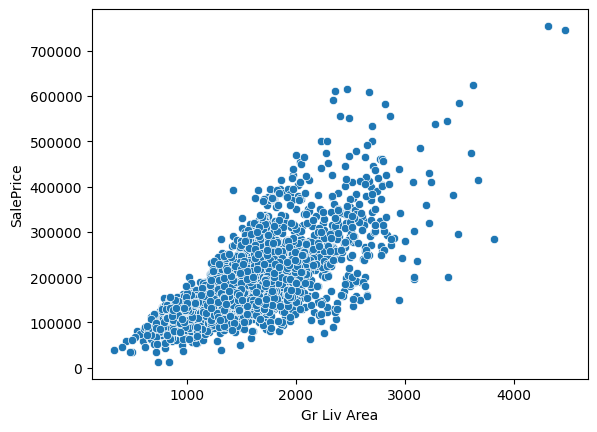

In [40]:
sns.scatterplot(x=df["Gr Liv Area"], y=df["SalePrice"])

In [41]:
df.drop('PID',axis=1,inplace=True) # variable qui est pas trop util pour nous

In [42]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [43]:
def missing_percentage(df):
    percentage = 100 * df.isnull().sum() / len(df)
    rank = percentage.sort_values(ascending=False)
    na = rank[rank > 0]
    return na

In [44]:
missing = missing_percentage(df)
missing

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Yr Blt      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Finish      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Bsmt Cond          2.733174
Mas Vnr Area       0.785787
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
BsmtFin SF 2       0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
BsmtFin SF 1       0.034165
Electrical         0.034165
Bsmt Unf SF        0.034165
Garage Cars        0.034165
dtype: float64

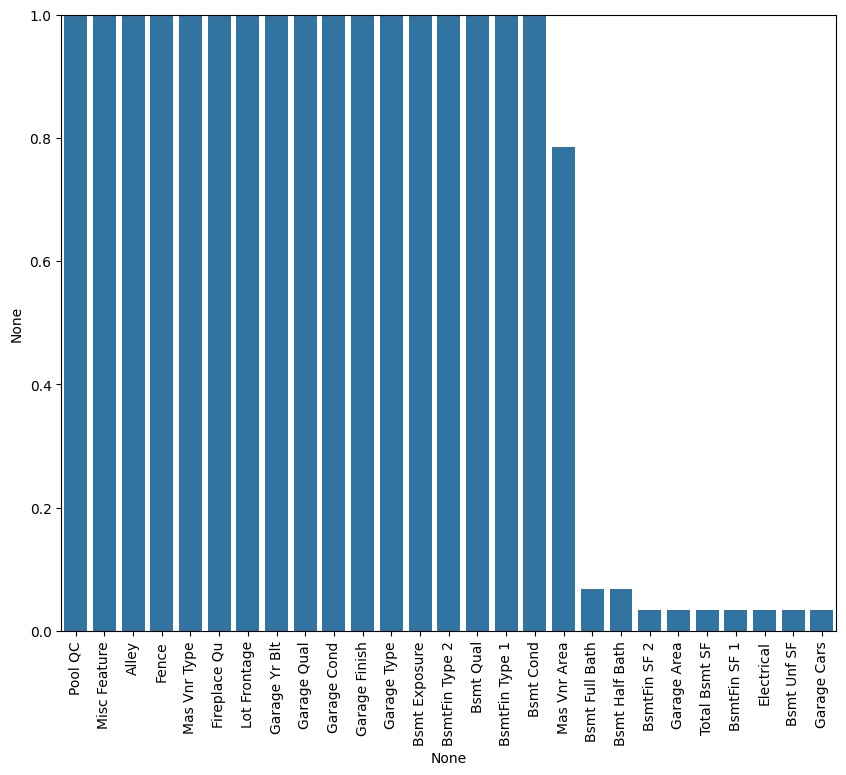

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(x=missing.index, y=missing)
plt.xticks(rotation=90)
plt.ylim(0,1);

On commence à traiter les valeur manquant par le taux le plus petit.

In [46]:
print(df[df['Garage Area'].isna()][['Garage Area','Garage Cars','Garage Cond','Garage Finish']])
df.dropna(subset=['Garage Area','Electrical'],axis=0,inplace=True)

      Garage Area  Garage Cars Garage Cond Garage Finish
2236          NaN          NaN         NaN           NaN


In [47]:
missing_percentage(df)

Pool QC           99.589744
Misc Feature      96.410256
Alley             93.230769
Fence             80.478632
Mas Vnr Type      60.615385
Fireplace Qu      48.547009
Lot Frontage      16.752137
Garage Yr Blt      5.401709
Garage Qual        5.401709
Garage Cond        5.401709
Garage Finish      5.401709
Garage Type        5.367521
Bsmt Exposure      2.837607
BsmtFin Type 2     2.769231
Bsmt Qual          2.735043
BsmtFin Type 1     2.735043
Bsmt Cond          2.735043
Mas Vnr Area       0.786325
Bsmt Full Bath     0.068376
Bsmt Half Bath     0.068376
BsmtFin SF 2       0.034188
Bsmt Unf SF        0.034188
Total Bsmt SF      0.034188
BsmtFin SF 1       0.034188
dtype: float64

In [48]:
# colonnes Num de Bsmt --> fill par 0
bsmt_num_cols = ['BsmtFin SF 1', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# colonnes Cat de Bsmt
bsmt_cat_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_cat_cols] = df[bsmt_cat_cols].fillna('None')

# Mas Vnr type, Mas Vnr Area
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

# garage
gar_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_cols] = df[gar_cols].fillna('None')
df['Gargae Yr Blt'] = df['Garage Yr Blt'].fillna(0) # car maison sans garage ne possède pas de l'année construction et on n'a pas d'autre solution à la place de 0

# gros colonnes NA
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

# autres
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean()))
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

df = df.dropna()

## Catégorie Encodage

In [49]:
df['MS SubClass'] = df['MS SubClass'].astype('str')

In [50]:
my_cat_df = df.select_dtypes('O')
my_num_df = df.select_dtypes(exclude='O')

C:\Users\lyhen\AppData\Local\Temp\ipykernel_20984\2889907558.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  my_cat_df = df.select_dtypes('O')


In [51]:
df_dummies_obj = pd.get_dummies(my_cat_df,drop_first=True)
df_final = pd.concat([my_num_df,df_dummies_obj],axis=1)

## Entraînement

In [53]:
X = df_final.drop('SalePrice',axis = 1)
y = df_final['SalePrice']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.fit_transform(X_test)

In [56]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet(max_iter=10000)
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(EN, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

In [57]:
grid_model.fit(scale_X_train, y_train)
grid_model.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


c:\Users\lyhen\Downloads\ML\.env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.314e+10, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\lyhen\Downloads\ML\.env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.034e+10, tolerance: 1.114e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\lyhen\Downloads\ML\.env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

{'alpha': 100, 'l1_ratio': 1}

## Evaluation

In [58]:
y_pred = grid_model.predict(scale_X_test)

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(y_test, y_pred))
np.sqrt(mean_absolute_error(y_test, y_pred))


15697.457244100196


np.float64(125.28949374987592)